In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [260]:
df = pd.read_excel("C:/Users/Admin/Documents/momo test/data_to_train.xlsx")
df

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0,1005336,0,1,3,685,336,300.0,1,10000,0
1,10054894,0,1,3,531,59,2000.0,1,100000,1
2,10055943,0,1,3,254,53,600.0,1,20000,0
3,10066290,0,0,4,792,234,400.0,1,20000,0
4,10066423,0,0,6,1288,255,600.0,1,20000,0
...,...,...,...,...,...,...,...,...,...,...
13385,997497,1,1,5,1368,227,2000.0,1,50000,1
13386,9978082,0,0,2,653,221,200.0,1,10000,0
13387,9981781,0,0,6,290,184,1000.0,1,50000,0
13388,9993038,1,0,6,407,304,400.0,1,10000,0


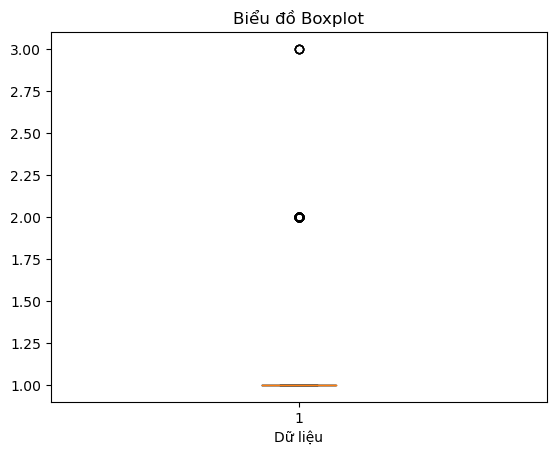

In [235]:
plt.boxplot(df.frequency)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()


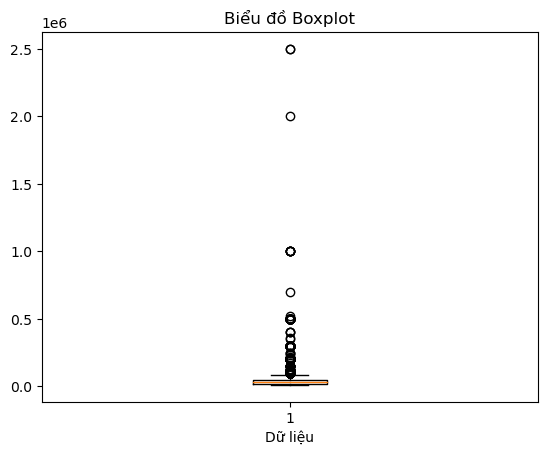

In [236]:
plt.boxplot(df.monetary)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()


In [263]:
# Hàm xử lý outlier bằng IQR cho một cột và cập nhật giá trị ngoại lệ thành upper_bound
def update_outliers_to_upper_bound(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    column[column > upper_bound] = upper_bound
    return column

# Áp dụng hàm xử lý outlier cho từng cột trong DataFrame
df['monetary'] = df[['monetary']].apply(update_outliers_to_upper_bound)

In [238]:
update_outliers_to_upper_bound(df.monetary)

0        10000
1        95000
2        20000
3        20000
4        20000
         ...  
13385    50000
13386    10000
13387    50000
13388    10000
13389    10000
Name: monetary, Length: 13390, dtype: int64

In [239]:
df['frequency'] = df[['frequency']].apply(update_outliers_to_upper_bound)

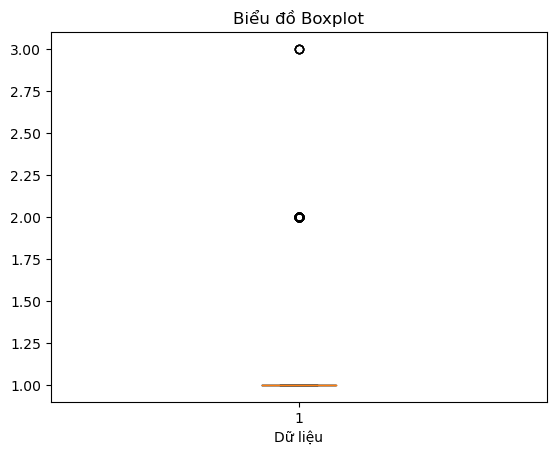

In [264]:
plt.boxplot(df.frequency)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()

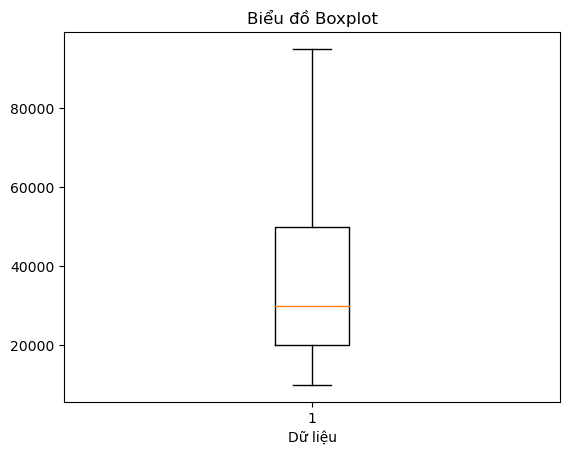

In [265]:
plt.boxplot(df.monetary)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()

In [242]:
value = np.unique(df[['User_id']])
len(value)

13390

In [266]:
df_segmentation = df.copy()

In [267]:
df_segmentation

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0,1005336,0,1,3,685,336,300.0,1,10000,0
1,10054894,0,1,3,531,59,2000.0,1,95000,1
2,10055943,0,1,3,254,53,600.0,1,20000,0
3,10066290,0,0,4,792,234,400.0,1,20000,0
4,10066423,0,0,6,1288,255,600.0,1,20000,0
...,...,...,...,...,...,...,...,...,...,...
13385,997497,1,1,5,1368,227,2000.0,1,50000,1
13386,9978082,0,0,2,653,221,200.0,1,10000,0
13387,9981781,0,0,6,290,184,1000.0,1,50000,0
13388,9993038,1,0,6,407,304,400.0,1,10000,0


                    User_id  urban_flag  gender_flag  age_rank  \
User_id            1.000000   -0.100069    -0.001053 -0.031621   
urban_flag        -0.100069    1.000000    -0.028772 -0.089472   
gender_flag       -0.001053   -0.028772     1.000000 -0.047267   
age_rank          -0.031621   -0.089472    -0.047267  1.000000   
relationship_time -0.328113    0.159133     0.027745 -0.071395   
recency           -0.067586    0.088749     0.006177 -0.045641   
revenue           -0.045033    0.026392     0.037864  0.062516   
frequency         -0.019956    0.010108    -0.000221 -0.004747   
monetary          -0.053184    0.022029     0.054101  0.085188   
behaft            -0.051652    0.022874     0.005895  0.055103   

                   relationship_time   recency   revenue  frequency  monetary  \
User_id                    -0.328113 -0.067586 -0.045033  -0.019956 -0.053184   
urban_flag                  0.159133  0.088749  0.026392   0.010108  0.022029   
gender_flag                 0.

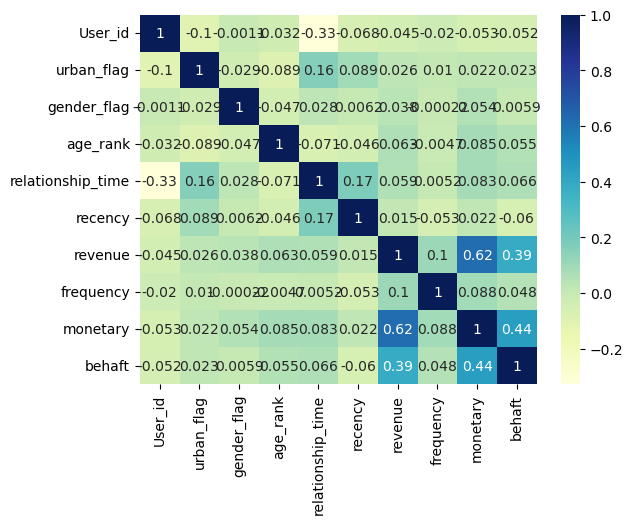

In [277]:

# import modules 
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 
  

# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(df.corr()) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show() 

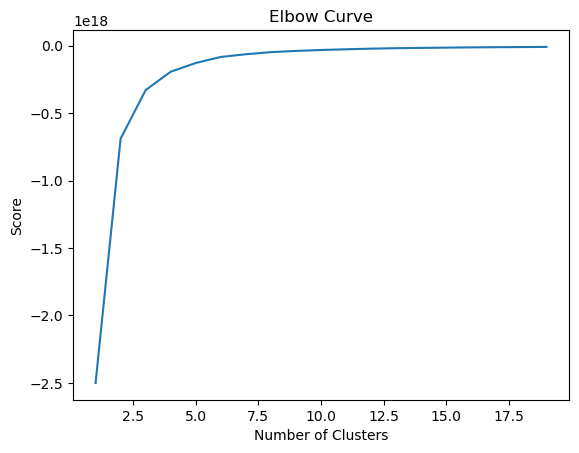

In [268]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_segmentation).score(df_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [270]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_segmentation)

In [271]:
df_segmentation['cluster'] = kmeans.labels_

In [272]:
#check our hypothesis

df_segmentation[df_segmentation.cluster == 0].head(10)

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft,cluster
6840,44601124,0,1,6,700,164,8000.0,1,95000,1,0
6841,44603808,0,1,1,675,196,400.0,1,10000,0,0
6842,44608981,0,0,6,749,225,1000.0,1,50000,0,0
6843,44609573,0,1,6,749,171,3000.0,1,95000,0,0
6844,44614070,1,0,2,519,131,6000.0,1,95000,1,0
6845,44614948,0,0,2,413,66,800.0,1,20000,1,0
6846,44615277,0,1,4,438,20,2000.0,1,95000,1,0
6847,44617121,0,0,2,413,338,1000.0,1,50000,0,0
6848,44619915,0,0,3,748,93,4000.0,1,95000,1,0
6849,44621869,1,1,4,743,243,1500.0,1,50000,0,0


In [274]:
df_segmentation.groupby('cluster').count()

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
cluster,,,,,,,,,,
0,6049,6049,6049,6049,6049,6049,6049,6049,6049,6049
1,1919,1919,1919,1919,1919,1919,1919,1919,1919,1919
2,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422


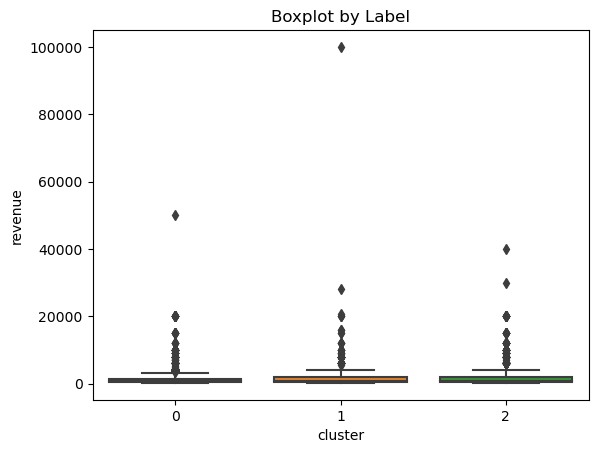

In [276]:
data = df_segmentation[["revenue","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='revenue', data=df_1)
plt.xlabel('cluster')
plt.ylabel('revenue')
plt.title('Boxplot by Label')
plt.show()


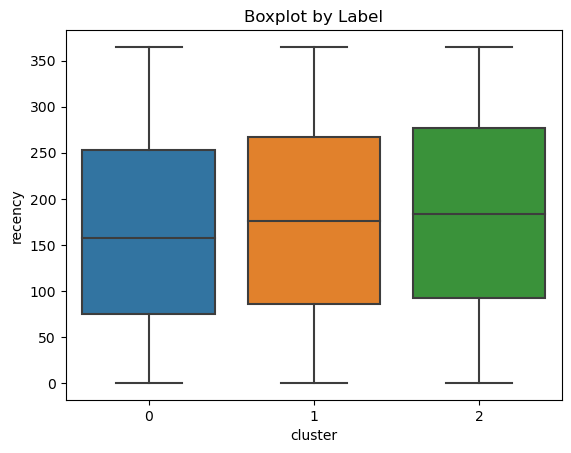

In [275]:
data = df_segmentation[["recency","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='recency', data=df_1)
plt.xlabel('cluster')
plt.ylabel('recency')
plt.title('Boxplot by Label')
plt.show()


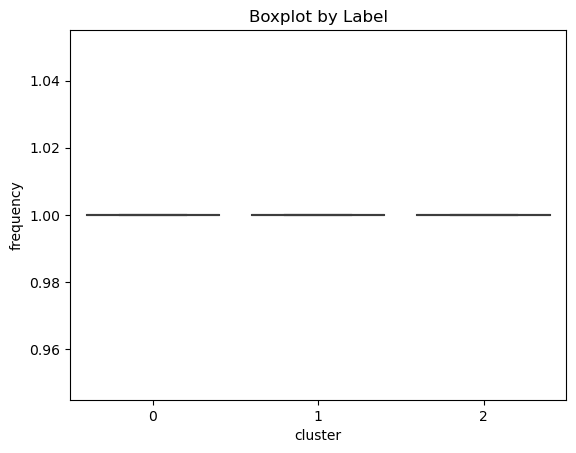

In [251]:
data = df_segmentation[["frequency","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='frequency', data=df_1)
plt.xlabel('cluster')
plt.ylabel('frequency')
plt.title('Boxplot by Label')
plt.show()

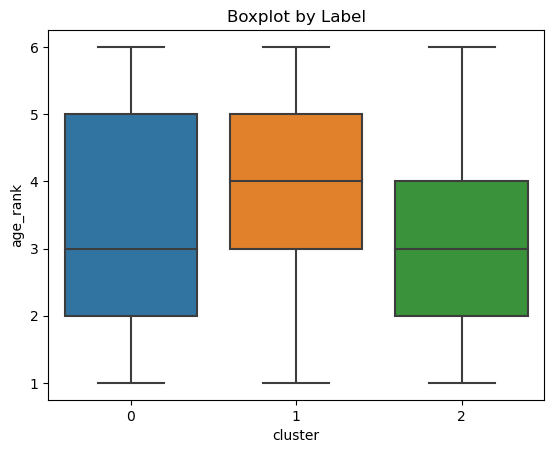

In [252]:
data = df_segmentation[["age_rank","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='age_rank', data=df_1)
plt.xlabel('cluster')
plt.ylabel('age_rank')
plt.title('Boxplot by Label')
plt.show()

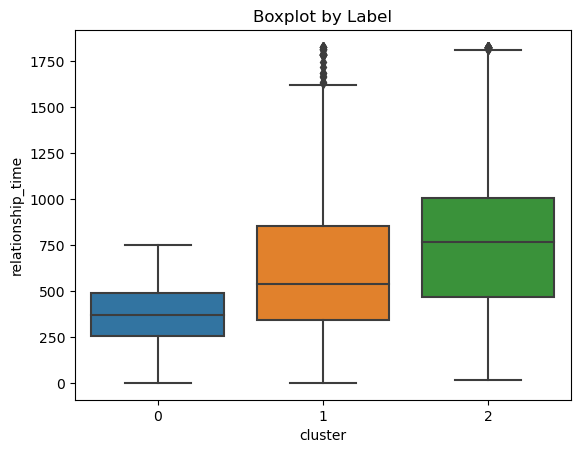

In [253]:
data = df_segmentation[["relationship_time","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='relationship_time', data=df_1)
plt.xlabel('cluster')
plt.ylabel('relationship_time')
plt.title('Boxplot by Label')
plt.show()

In [254]:
df_segmentation

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,frequency,monetary,behaft,cluster
0,1005336,0,1,3,685,336,1,10000,0,1
1,10054894,0,1,3,531,59,1,95000,1,1
2,10055943,0,1,3,254,53,1,20000,0,1
3,10066290,0,0,4,792,234,1,20000,0,1
4,10066423,0,0,6,1288,255,1,20000,0,1
...,...,...,...,...,...,...,...,...,...,...
13385,997497,1,1,5,1368,227,1,50000,1,1
13386,9978082,0,0,2,653,221,1,10000,0,1
13387,9981781,0,0,6,290,184,1,50000,0,1
13388,9993038,1,0,6,407,304,1,10000,0,1


   cluster  behaft  value
0        0       0   5171
1        0       1    878
2        1       0   1556
3        1       1    363
4        2       0   4455
5        2       1    967


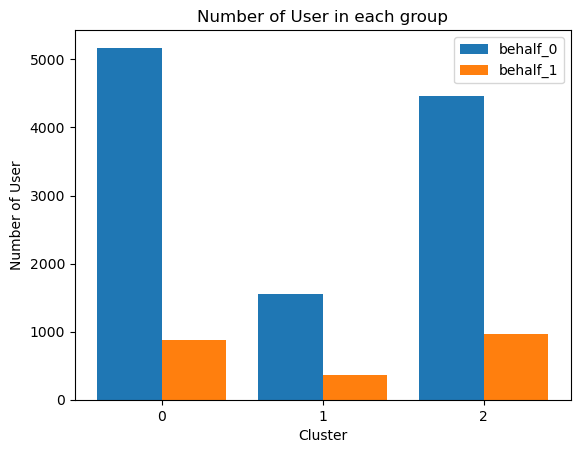

In [255]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["behaft","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','behaft']).sum().reset_index()
print(df_1)
behalf_0 = df_1[df_1['behaft']==0]['value'].to_list()
behalf_1 = df_1[df_1['behaft']==1]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, behalf_0, 0.4, label = 'behalf_0') 
plt.bar(X_axis + 0.2, behalf_1, 0.4, label = 'behalf_1') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

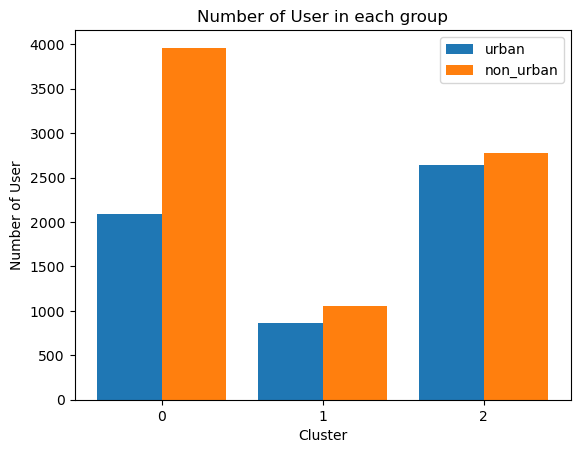

In [256]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["urban_flag","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)
df_1

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','urban_flag']).sum().reset_index()
df_1
urban = df_1[df_1['urban_flag']==1]['value'].to_list()
non_urban = df_1[df_1['urban_flag']==0]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, urban, 0.4, label = 'urban') 
plt.bar(X_axis + 0.2, non_urban, 0.4, label = 'non_urban') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

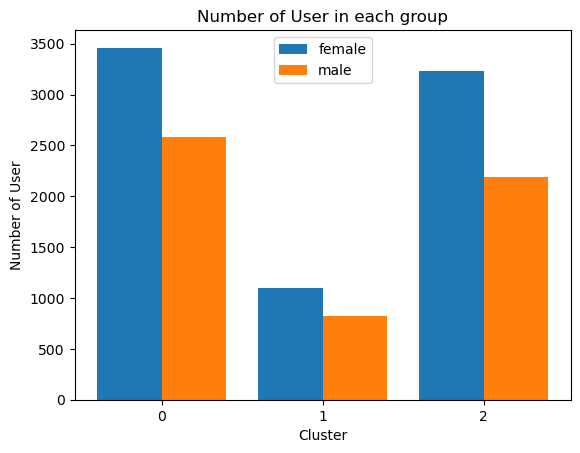

In [257]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["gender_flag","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)
df_1

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','gender_flag']).sum().reset_index()
df_1
female = df_1[df_1['gender_flag']==1]['value'].to_list()
male = df_1[df_1['gender_flag']==0]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, female, 0.4, label = 'female') 
plt.bar(X_axis + 0.2, male, 0.4, label = 'male') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

In [258]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, df_segmentation., width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

SyntaxError: invalid syntax (270303179.py, line 6)

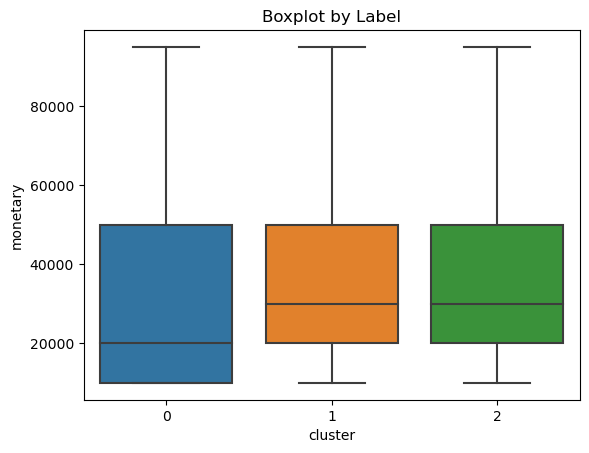

In [259]:
data = df_segmentation[["monetary","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='monetary', data=df_1)
plt.xlabel('cluster')
plt.ylabel('monetary')
plt.title('Boxplot by Label')
plt.show()